Importing the model architecture from file.py 

In [1]:
import sys
sys.path.append('/kaggle/input/architecture')
from file import unet_generator


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model = unet_generator()

In [3]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ [(None, 128, 128,      │     12,944,960 │ input_layer_7[0][0]    │
│                           │ 128), (None, 128, 128, │                │                        │
│                           │ 128), (None, 64, 64,   │                │                        │
│                           │ 256), (None, 64, 64,   │                │                        │
│                           │ 256), (None, 32, 32,   │                │                        │
│                           │ 512), (None, 32, 32,   │                │                        │
│                           │ 512), (None, 16, 16,   │                │                        │
│                           │ 512)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 16, 16, 512)    │      2,361,344 │ functional[1][6]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 32, 32, 512)    │      2,361,344 │ sequential[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 256)  │              0 │ sequential_1[1][0],    │
│ (Concatenate)             │                        │                │ functional[1][4],      │
│                           │                        │                │ sequential_3[1][0],    │
│                           │                        │                │ functional[1][2],      │
│                           │                        │                │ sequential_5[1][0],    │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 1024)   │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 32, 32, 256)    │      2,360,320 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 64, 64, 256)    │        590,848 │ sequential_2[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64, 64, 512)    │              0 │ concatenate_1[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 64, 64, 128)    │        590,336 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 128, 128, 128)  │        147,968 │ sequential_4[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 128, 128, 256)  │              0 │ concatenate_1[2][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 256, 256, 1)    │          2,305 │ dropout_5[0][0]        │
│ (Conv2DTranspose)    

 Total params: 21,359,425 (81.48 MB)

 Trainable params: 8,410,881 (32.08 MB)

 Non-trainable params: 12,948,544 (49.39 MB)

Loading the save models weights

In [4]:
model.load_weights('/kaggle/input/final_model/tensorflow2/default/1/v1.weights.h5')

Function to infer those 3 images: [Test Images](https://drive.google.com/drive/folders/1WjyRGnJEAtN8Qz4-Mrey2yJT9tDO41n7) and visualize it's predicted mask 

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(256, 256)):

    img = cv2.imread(image_path) 
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img_resized = cv2.resize(img_rgb, target_size) 
    img_normalized = img_resized.astype('float32') / 255.0 
    return img_normalized



def predict_mask(model, image):
    """
    Predict the mask for the input image using the provided model.
    
    Args:
        model: Trained model for prediction.
        image (np.ndarray): Preprocessed image.
    
    Returns:
        np.ndarray: Predicted mask.
    """
    image_input = np.expand_dims(image, axis=0)  
    predicted_mask = model.predict(image_input)  
    return np.squeeze(predicted_mask) 


def display_results(original_image, predicted_mask):
    """
    Display the original image and its predicted mask.
    
    Args:
        original_image (np.ndarray): The original image.
        predicted_mask (np.ndarray): The predicted mask.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  
    
    axes[1].imshow(predicted_mask, cmap='gray')
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off') 
    
    plt.tight_layout()
    plt.show()

def display_results_overlayed(original_image, predicted_mask, alpha=0.5):
    """
    Display the original image and its predicted mask overlaid.
    
    Args:
        original_image (np.ndarray): The original image.
        predicted_mask (np.ndarray): The predicted mask.
        alpha (float): The transparency level for the overlay (0.0 = fully transparent, 1.0 = fully opaque).
    """

    mask_colored = np.zeros_like(original_image)
    mask_colored[:, :, 0] = predicted_mask * 255  # Red channel
    mask_colored[:, :, 1] = predicted_mask * 255  # Green channel
    mask_colored[:, :, 2] = predicted_mask * 255  # Blue channel
    

    overlaid_image = cv2.addWeighted(original_image, 1 - alpha, mask_colored, alpha, 0)
    

    plt.figure(figsize=(8, 8))
    plt.imshow(overlaid_image)
    plt.title('Original Image with Predicted Mask Overlay')
    plt.axis('off')
    plt.show()







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


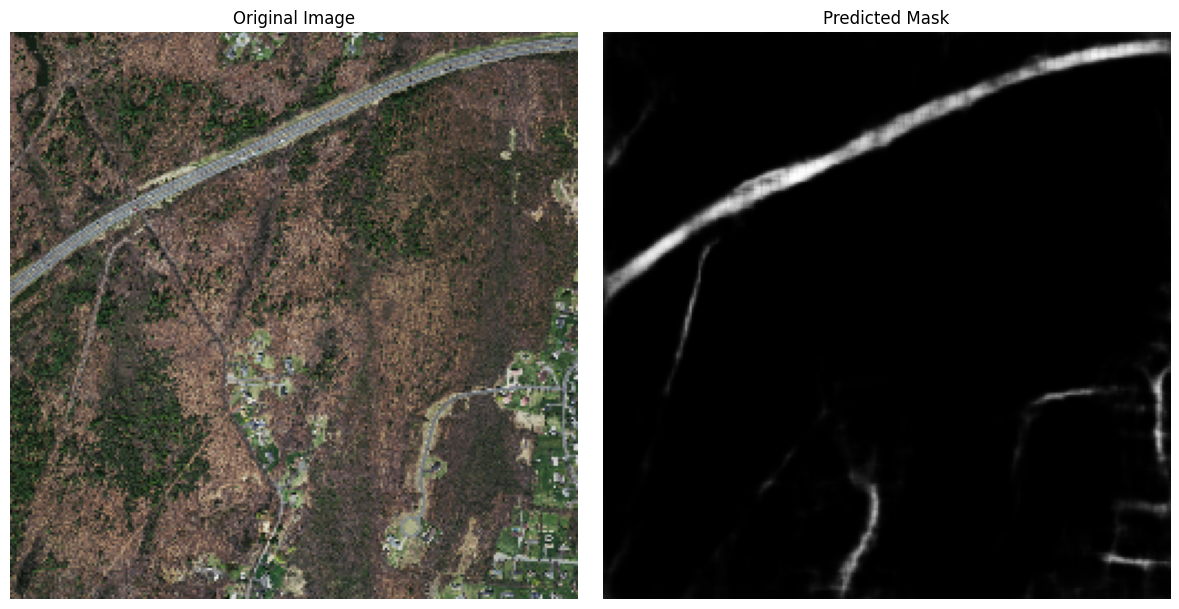

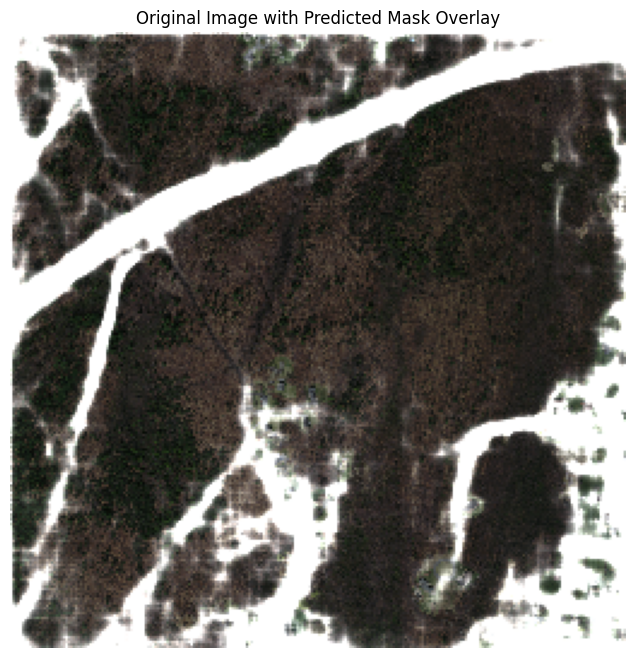

In [9]:
image_path = '/kaggle/input/test-dataset/test/10378780_15.tiff' 
img_resized = load_and_preprocess_image(image_path)
predicted_mask = predict_mask(model, img_resized)
display_results(img_resized, predicted_mask)
display_results_overlayed(img_resized, predicted_mask)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


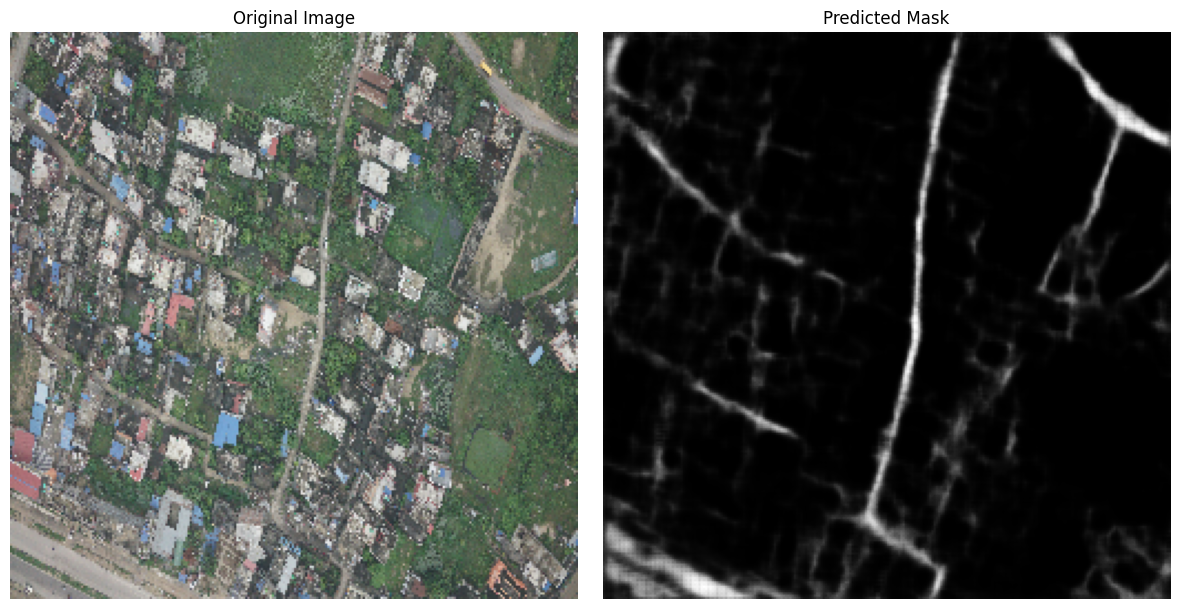

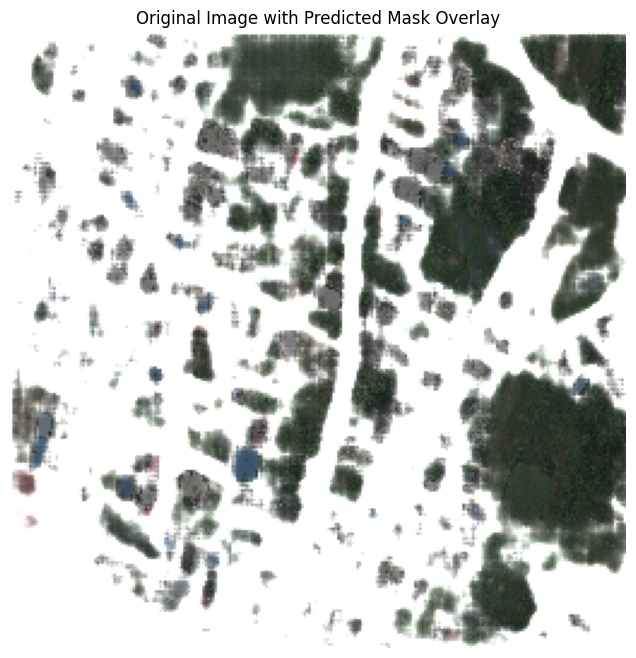

In [11]:
image_path = '/kaggle/input/test-dataset/test/Flight_01_00032.JPG' 
img_resized = load_and_preprocess_image(image_path)
predicted_mask = predict_mask(model, img_resized)
display_results(img_resized, predicted_mask)
display_results_overlayed(img_resized, predicted_mask)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


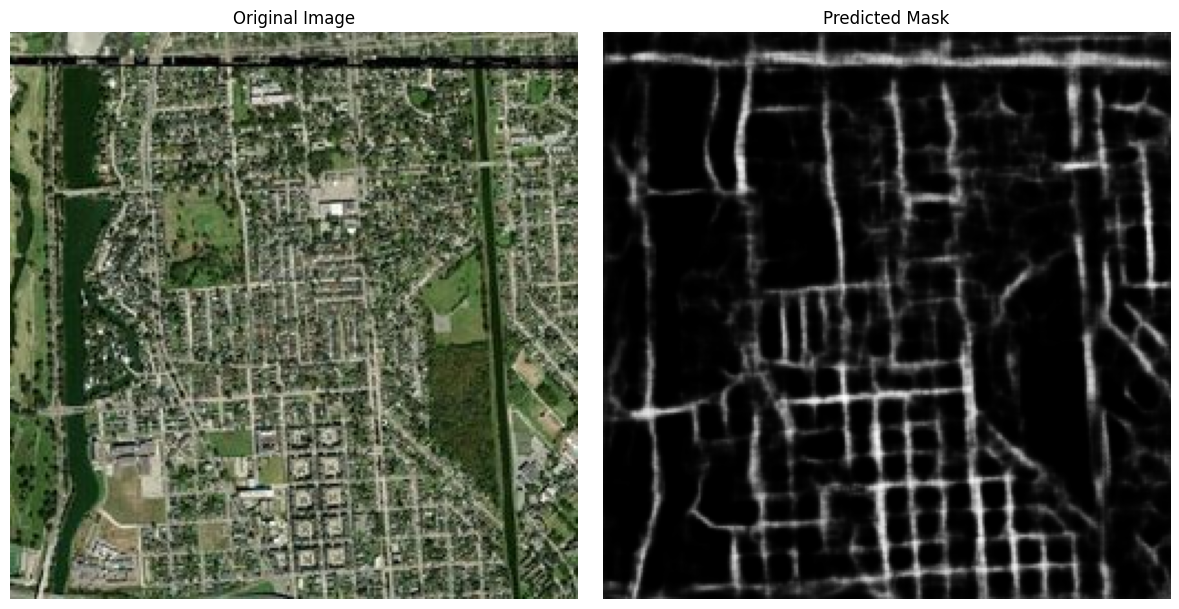

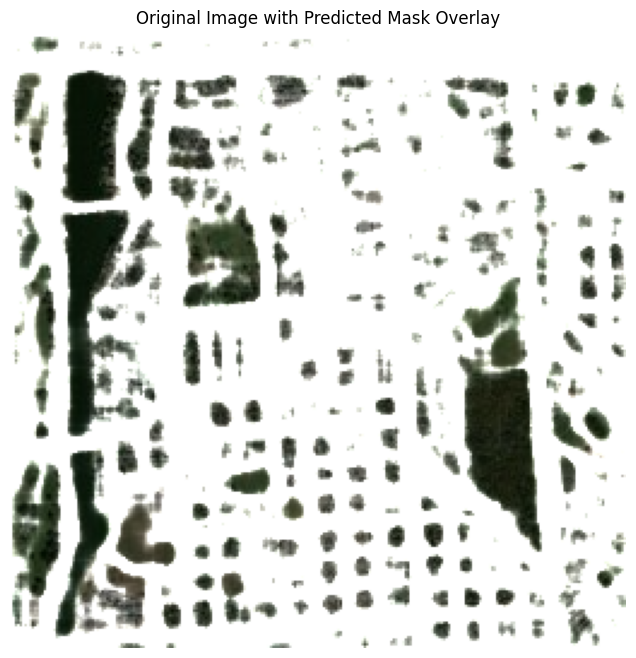

In [12]:
image_path = '/kaggle/input/test-dataset/test/6759.jpeg' 
img_resized = load_and_preprocess_image(image_path)
predicted_mask = predict_mask(model, img_resized)
display_results(img_resized, predicted_mask)
display_results_overlayed(img_resized, predicted_mask)